<h1 style="text-align:center">PI Controller Design for a <br> Position Control of a Mass with Friction</h1>
<h3 style="text-align:center">MCHE474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this notebook we'll explore the possibility of using a Proportional-plus-integral (PI) controller to move a mass to a desired location. The system of interest is shown in Figure 1, where $m$ is the mass, $u(t)$ is a force input. The dissipative effects are model as a visous damper to ground. So, the force is $b \dot{x}$, where $b$ is a constant.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Mass_viscousDissipation.png" alt="Mass with Force Input" width=35%><br>
    <strong>Figure 1: Mass with Force Input</strong>
</p>

The equation of motion for this system is:

$ \quad m \ddot{x} + b \dot{x} = u $

which results in a plant transfer function, $G_p$, of:

$ \quad G_p = \frac{X}{U} = \frac{1}{s (ms + b)} $

The block diagram for the feedback controller for this system matches the form we traditionally see, shown in Figure 2.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/blockDiagram_normalFeedback.png" alt="Feedback Control Block Diagram" width=50%><br>
    <strong>Figure 2: Feedback Control Block Diagram</strong>
</p>

The controller block, $G_c$, is the PI controller:

$ \quad G_c(s) = k_p + \frac{k_i}{s} $

We can rewrite the PI controller in the form below, to put the open-loop transfer function into a form suitable for the root locus:

$ \quad G_c(s) = k_p\left(1 + \frac{k_i}{k_p s}\right) = k_p \left(1 + \frac{1}{T_i s}\right) $ 

where $T_i = k_i/k_p$. Using this form, we can write the open-loop transfer function for this system:

$ \quad G_cG_p = \frac{k_p (1 + T_i s)}{T_i s^2 (ms + b)}$

This transfer function has a zero at $-1/T_i$ and poles at 0, 0, and $-b/m$.

During the design process, we have choice over the constant $T_i$, so we will be able to place the zero either to the left or to the right of the pole at $-b/m$. Below, we will investigate these two choices. 

***Note:*** The parameters chosen for $m$, $b$, and $T_i$ are not necessary representative of any real system, but are instead selected to make this analysis more generalizable.

We'll being the "coding" part of this notebook by importing Numpy, the Control System Library, and matplotlib, as usual.

In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## PI Zero to the Left of $-b/m$ Pole

We'll first look at the case where the PI controller zero is placed to the left of the plant pole at $-b/m$.

In [3]:
m = 1 
b = 1
Ti = 0.5

num = [Ti, 1]
den = [m * Ti, b * Ti, 0, 0]

sys = control.tf(num, den)

We can start by plotting the poles and zeros of the open-loop transfer function. Most of the code below is just to make the plot easier to read.

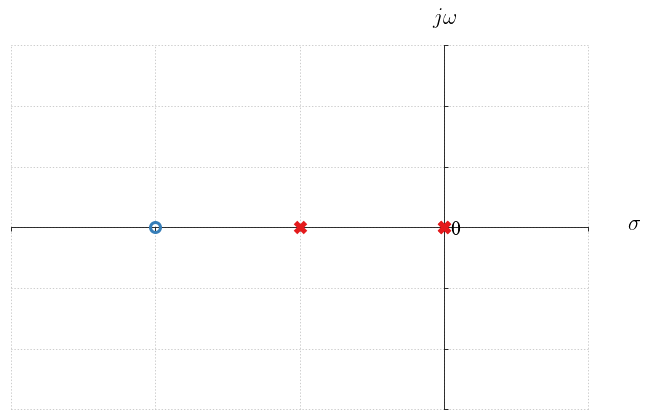

In [4]:
poles, zeros = control.pzmap.pzmap(sys, Plot=False)

# Let's plot the pole-zero map with better formatting than the stock command would

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(3/4, 1.05)


plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')


# uncomment below and set limits if needed
plt.xlim(-3, 1)
# plt.ylim(0, 10)

plt.xticks([-3,-2,-1,0,1],['','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.5, -1.0, -0.5, 0, 0.5, 1, 1.5],['','', '', '0', '','',''])

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_ExtraZero_PoleZeroMap.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Remember that, althought we can't tell from this plot, there are two poles at 0.

Now, we can plot the root locus, using the control System Library's built in `.root_locus()` function. We'll add a few options:
* `kvect=np.linspace(0,100,10001)` : Specify the range of gains to plot the locus over
* `Plot=False` : Don't plot the results (since we want to plot them ourselves to give better control over the styling)

In [5]:
roots, gains = control.root_locus(sys, kvect=np.linspace(0,100,10001), Plot=False)

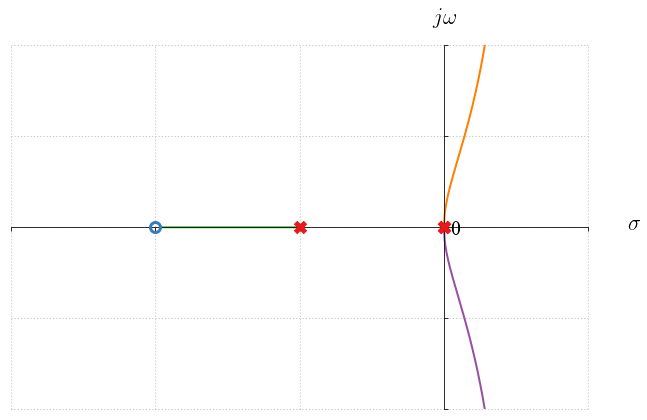

In [6]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(3/4, 1.05)

plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')

plt.plot(roots.real, roots.imag, linewidth=2, linestyle='-', label=r'Data 1')
# plt.plot(x2, y2, linewidth=2, linestyle='--', label=r'Data 2')
# plt.plot(x3, y3, linewidth=2, linestyle='-.', label=r'Data 3')
# plt.plot(x4, y4, linewidth=2, linestyle=':', label=r'Data 4')

plt.xticks([-3,-2,-1,0,1],['','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-2.0, -1, 0, 1, 2],['','', '0', '',''])

# uncomment below and set limits if needed
plt.xlim(-3, 1)
plt.ylim(-2, 2)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('example_rootLocus_unstable.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

This system is ***never*** stable for this set of paramters! The root locus immediate transitions to the right-half-plane, indicating instability.

## PI Zero to the Right of $-b/m$ Pole

We'll first look at the case where the PI controller zero is placed to the right of the plant pole at $-b/m$.

In [7]:
m = 1 
b = 1
Ti = 2.0

num = [Ti, 1]
den = [m * Ti, b * Ti, 0, 0]

sys = control.tf(num, den)

We can start by plotting the poles and zeros of the open-loop transfer function. Most of the code below is just to make the plot easier to read.

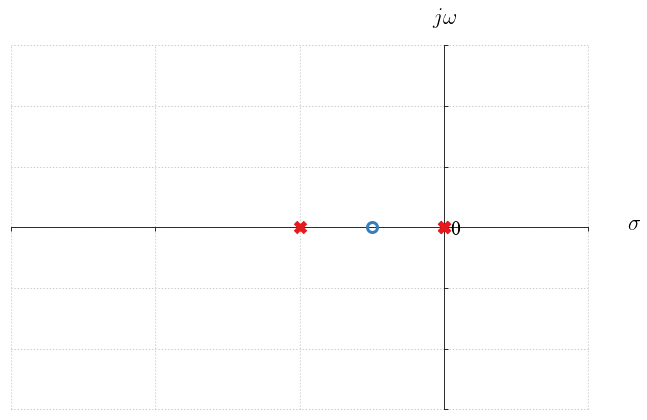

In [8]:
poles, zeros = control.pzmap.pzmap(sys, Plot=False)

# Let's plot the pole-zero map with better formatting than the stock command would

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(3/4, 1.05)


plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')


# uncomment below and set limits if needed
plt.xlim(-3, 1)
# plt.ylim(0, 10)

plt.xticks([-3,-2,-1,0,1],['','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.5, -1.0, -0.5, 0, 0.5, 1, 1.5],['','', '', '0', '','',''])

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_ExtraZero_PoleZeroMap.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Remember that, althought we can't tell from this plot, there are two poles at 0.

Now, we can plot the root locus, using the control System Library's built in `.root_locus()` function. We'll add a few options:
* `kvect=np.linspace(0,100,10001)` : Specify the range of gains to plot the locus over
* `Plot=False` : Don't plot the results (since we want to plot them ourselves to give better control over the styling)

In [9]:
roots, gains = control.root_locus(sys, kvect=np.linspace(0,100,10001), Plot=False)

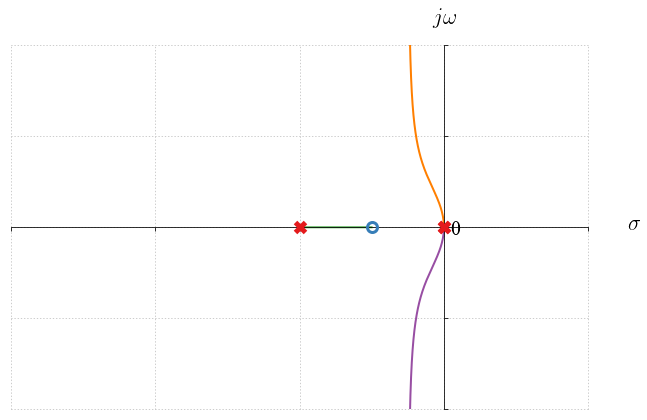

In [10]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(3/4, 1.05)

plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')

plt.plot(roots.real, roots.imag, linewidth=2, linestyle='-', label=r'Data 1')
# plt.plot(x2, y2, linewidth=2, linestyle='--', label=r'Data 2')
# plt.plot(x3, y3, linewidth=2, linestyle='-.', label=r'Data 3')
# plt.plot(x4, y4, linewidth=2, linestyle=':', label=r'Data 4')

plt.xticks([-3,-2,-1,0,1],['','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-2.0, -1, 0, 1, 2],['','', '0', '',''])

# uncomment below and set limits if needed
plt.xlim(-3, 1)
plt.ylim(-2, 2)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('example_rootLocus_unstable.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Unlike the previous choice for $T_i$, this system is stable. However, we may need a different controller to achieve the desired performance.

Let's look at the step response of this system for a few different proportional gains. We'll start by plotting the location of the closed-loop poles on the root locus for the three gains we'll look at. Then, we'll calculate the closed-loop transfer function to use in the simulations using each of those gains. Finally, we'll run the step response simluations.

In [11]:
# To find the root for a particular gain, we'll find the index of 
# the gains vector that most closely matches the desired gain.
# Then, we'll get the pol
kp0p1_roots = roots[np.argmin(np.abs(0.1-gains))]
kp1_roots = roots[np.argmin(np.abs(1-gains))]
kp5_roots = roots[np.argmin(np.abs(5-gains))]

Now, we'll add those pole locations on top of the root-locus.

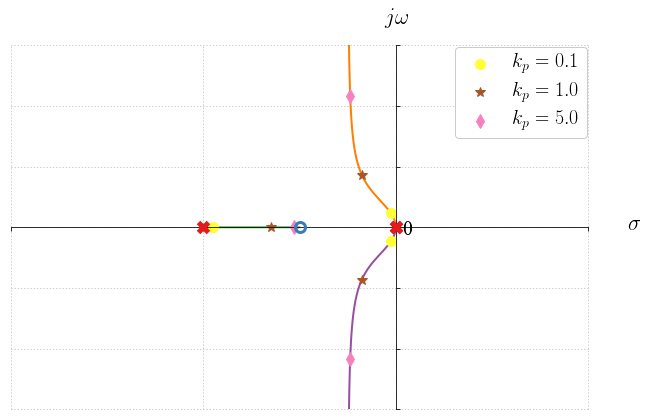

In [12]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(2/3, 1.05)

plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'')

plt.plot(roots.real, roots.imag, linewidth=2, linestyle='-', label=r'')
plt.plot(kp0p1_roots.real, kp0p1_roots.imag, linewidth=2, marker='o', markersize=10, linestyle='', label=r'$k_p = 0.1$')
plt.plot(kp1_roots.real, kp1_roots.imag, linewidth=2, marker='*', markersize=10, linestyle='', label=r'$k_p = 1.0$')
plt.plot(kp5_roots.real, kp5_roots.imag, linewidth=2, marker='d', markersize=10, linestyle='', label=r'$k_p = 5.0$')

plt.xticks([-2,-1,0,1],['','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-3,-2.0, -1, 0, 1, 2,3],['','','', '0', '','',''])

# uncomment below and set limits if needed
plt.xlim(-2, 1)
plt.ylim(-3, 3)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('example_rootLocus_unstable.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

***Note:*** The scale of this root locus is a bit different than the ones shown above. We've stretch the vertical axis to allow the closed-loop poles at $k_p = 5.0$ to be seen. The horizontal axis has also been zoomed in to allow us to better see the differences in pole location.

To create the closed-loop version of our open-loop transfer function, we can use the `feedback()` function from the control system library. We'll define a closed-loop system for each gain. The help for this function can be found using the `control.feedback?` trick in a Jupyter Notebook cell or [checking the documentation](http://python-control.readthedocs.io/en/latest/generated/control.feedback.html).

In [13]:
sys_kp0p1 = control.feedback(0.1 * sys)
sys_kp1 = control.feedback(1.0 * sys)
sys_kp5 = control.feedback(5.0 * sys)

Now, we'll generate the step response for each of these systems.

In [14]:
# Time vector to simulate the step command on. The system is slow, so we need a long time.
time = np.linspace(0, 30, 3001)  

resp_kp0p1, t_kp0p1 = control.step(sys_kp0p1, time)
resp_kp1, t_kp1 = control.step(sys_kp1, time)
resp_kp5, t_kp5 = control.step(sys_kp5, time)

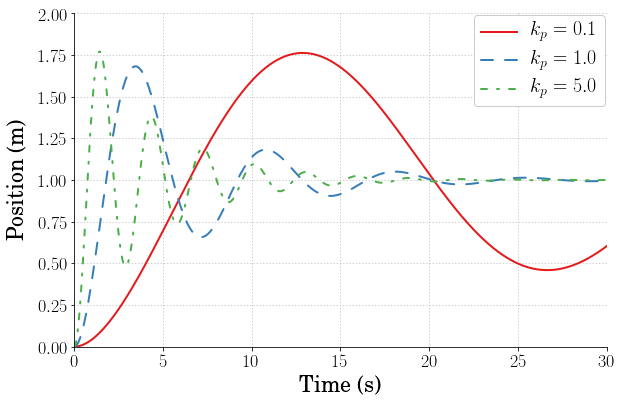

In [15]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t_kp0p1, resp_kp0p1 , linewidth=2, linestyle='-', label=r'$k_p = 0.1$')
plt.plot(t_kp1, resp_kp1, linewidth=2, linestyle='--', label=r'$k_p = 1.0$')
plt.plot(t_kp5, resp_kp5, linewidth=2, linestyle='-.', label=r'$k_p = 5.0$')
# plt.plot(x4, y4, linewidth=2, linestyle=':', label=r'Data 4')

# uncomment below and set limits if needed
plt.xlim(0, 30)
plt.ylim(0, 2)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('plot_filename.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

As we expected, the reponse speeds up (the rise time is reduced) as we increase the gain. However, the respone remains oscillatory, as the lightly-damped pole locations on the root locus suggested. If less overshoot or a faster settling time were needed, a derivative gain would need to be added.

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

In [16]:
# This cell will just improve the styling of the notebook
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))